## Apple or Tomato classification

In [98]:
import os
import matplotlib.pyplot as plt
import kagglehub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


### Import Dataset from kaggle

In [99]:
print("Downloading dataset...")
dataset_path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")
print("Dataset path:", dataset_path)

Dataset path: C:\Users\Victoria\.cache\kagglehub\datasets\samuelcortinhas\apples-or-tomatoes-image-classification\versions\1


Since the dataset is already splitted into train and test folders, we will use them directly.

In [100]:
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')


print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

Train directory exists: True
Test directory exists: True


In [101]:
img_size = (224, 224) # for more detailed results

batch_size = 32
epochs = 100

hidden_nodes = 128
output_nodes = 1 # 2 classes: apple and tomato, 0 and 1

validation_split_size = 0.2

### Preprocessing

In [102]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split_size
)

test_datagen = ImageDataGenerator(
                        rescale = 1.0/255                      
                    )

train_generator = train_datagen.flow_from_directory(
    dataset_path + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    dataset_path + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 236 images belonging to 2 classes.


Found 58 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


### Train CNN Model

In [103]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(hidden_nodes, activation='relu'),
    
    layers.Dense(output_nodes, activation='sigmoid')
])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.compile(
    optimizer='adam', 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.000001, 
    patience=5, 
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

history = model.fit(
    train_generator, 
    epochs=epochs, 
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
    validation_data=val_generator, 
    callbacks=[early_stopping], 
    class_weight={0: 1, 1: 1} 
)

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5450 - loss: 7.4424 - val_accuracy: 0.5312 - val_loss: 0.7069
Epoch 2/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.6250 - loss: 0.6506

c:\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6250 - loss: 0.6506 - val_accuracy: 0.5000 - val_loss: 0.7126
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 896ms/step - accuracy: 0.5594 - loss: 0.6808 - val_accuracy: 0.5312 - val_loss: 0.7138
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4688 - loss: 0.7331 - val_accuracy: 0.5625 - val_loss: 0.7048
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 912ms/step - accuracy: 0.5348 - loss: 0.6786 - val_accuracy: 0.5312 - val_loss: 0.8486
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5000 - loss: 0.7304 - val_accuracy: 0.5938 - val_loss: 0.6815
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 890ms/step - accuracy: 0.5987 - loss: 0.6395 - val_accuracy: 0.5625 - val_loss: 0.7815
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6250 - loss: 0.6652 - val_accuracy: 0.6562 - val_loss: 0.6526
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step - accuracy: 0.6592 - loss: 0.6432 - val_accuracy: 0.6562 - val_loss: 0.6734


In [105]:
_, accuracy = model.evaluate(test_generator)
print(f"Model Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6732 - loss: 0.6100
Model Accuracy: 0.6907


In [106]:
def plot_history(history):
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

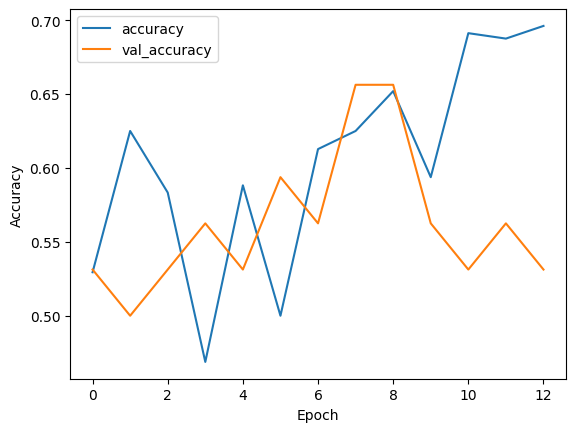

In [107]:
plot_history(history)

### MobileNetV2 

Aufgrund des kleinen Datensatzes ist ein CNN eher schlecht unf führt zu Overfitting bzw. schlechte Generalisierung. Deswegen haben wir etwas recherchiert und sind auf ein MobielNet2V gestoßen. Das ist ein ImageNet, das schon "fertig" auf Millionen Bilder trainiert ist. Dadurch lernt es schneller und besser auf kleinere Datensätze.

In [108]:
base_model = MobileNetV2(input_shape=(*img_size, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [109]:
base_model.trainable = False 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6554 - loss: 0.6209 - val_accuracy: 0.7414 - val_loss: 0.5594
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step - accuracy: 0.8694 - loss: 0.3122 - val_accuracy: 0.7759 - val_loss: 0.5120
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 691ms/step - accuracy: 0.8798 - loss: 0.2791 - val_accuracy: 0.8621 - val_loss: 0.3958
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 793ms/step - accuracy: 0.9068 - loss: 0.1999 - val_accuracy: 0.9138 - val_loss: 0.3317
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 730ms/step - accuracy: 0.9084 - loss: 0.2251 - val_accuracy: 0.8103 - val_loss: 0.5213
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 785ms/step - accuracy: 0.9593 - loss: 0.1649 - val_accuracy: 0.9310 - val_loss: 0.3225
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 733ms/step - accuracy: 0.9557 - loss: 0.1460 - val_accuracy: 0.8793 - val_loss: 0.3969
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.9605 - loss: 0.1366 - val_accuracy: 0.8966 - val

In [111]:
_, accuracy = model.evaluate(test_generator)
print(f"Model Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.8445 - loss: 0.3147
Model Accuracy: 0.8247


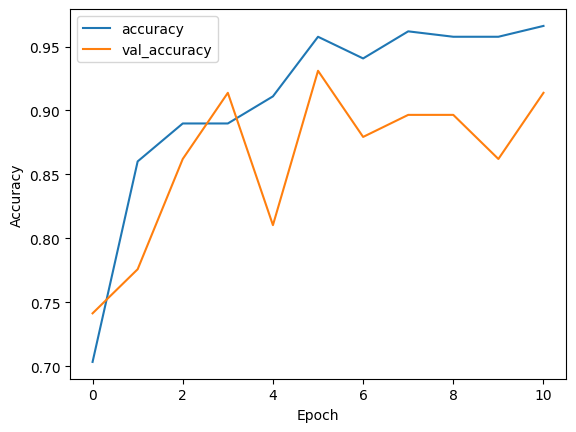

In [112]:
plot_history(history)

In [113]:
model.save("apples_tomatoes_model.h5")